In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import regionmask
import regionmask.defined_regions as rm
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import geopandas as gp
import cartopy
from tqdm import tqdm  # Fancy progress bars for our loops!

# Utility functions for stream-lining analysis
from utils import *

## China

['Xinjiang', 'Gansu', 'Yunnan', 'Heilongjiang', 'Jilin', 'Liaoning', 'Guangxi', 'Guangdong', 'Hainan', 'Fujian', 'Zhejiang', 'Shanghai', 'Jiangsu', 'Shandong', 'Hebei', 'Tianjin', 'Beijing', 'Sichuan', 'Chongqing', 'Guizhou', 'Hunan', 'Ningxia', 'Shaanxi', 'Qinghai', 'Shanxi', 'Jiangxi', 'Henan', 'Hubei', 'Anhui']


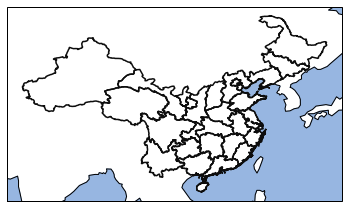

In [4]:
provinces = regionmask.defined_regions.natural_earth.states_provinces_10

df = load_jhu_df()
df.head()

country = 'Mainland China'
cdf = df[df['Country/Region'] == country]

province_names = cdf['Province/State'].unique()
province_names = [province for province in provinces.names if province in province_names] # intersection of both data sets

provinces = provinces[province_names]
print(provinces.names)
provinces.plot(add_label=False);

In [5]:
ds = xr.open_dataset('../data/daily_spec_humidity_2020.nc')
provinces_mask = provinces.mask(ds['longitude'], ds['latitude'], wrap_lon=True)
provinces_ma = np.ma.masked_invalid(provinces_mask)

In [6]:
varnames = ['t2m', 'q2m']
index = 0

country_list = []
province_list = []
date_list = []
variable_list = [[]]
for v in range(len(varnames)-1):
    variable_list.append([])

for province in tqdm(provinces.names):
    for v, varname in enumerate(varnames):
        pmean = ds[varname].where(provinces_ma == provinces[province].number).mean(dim=['latitude', 'longitude']).compute()
        for date in ds['time']:
            variable_list[v].append(pmean.sel(time=date).values)
            if v==0:
                country_list.append(country)
                province_list.append(province)
                date_list.append(date.values)

100%|██████████| 29/29 [07:04<00:00, 14.64s/it]


In [7]:
edf = pd.DataFrame({
    "Country/Region": country_list,
    "Province/State": province_list,
    "date": date_list,
})
vardict = {}
for v, varname in enumerate(varnames):
    edf[varname] = variable_list[v]

In [9]:
edf.to_csv(f"../data/processed/enviroment_provinces_{country}.csv")

## Italy
Coming soon.

## South Korea
Coming soon.